In [ ]:
import pandas as pd

data = pd.read_csv("iris.data", names = ['a','b','c','d', 'label'])
data

In [19]:
import torch
data_x = torch.from_numpy(data.iloc[:, :4].values)
data_y = data.iloc[:,4]

In [ ]:
import matplotlib.pyplot as plt

X = data_x - data_x.mean(dim=0)
plt.scatter(X[:,0], X[:,1])
plt.show()

In [ ]:
def findPC(X):
  w = torch.randn(X.shape[1])
  w_size = (w * w).sum() ** 0.5
  w /= w_size

  lr = 0.1

  for epoch in range(100):
    w.requires_grad_(True)
    variance = -((X * w).sum(dim=1)**2).mean()

    variance.backward()

    with torch.no_grad():
      w = w - lr * w.grad
      w /= (w * w).sum() ** 0.5

  w.requires_grad_(False) 
  return w, -variance.item()

In [32]:
w , v = findPC(X)
print(w,v)

tensor([-0.3616,  0.0823, -0.8566, -0.3588]) 4.1966750403008435


In [45]:
pcs = []
var = []
def PCA(k,X):
  Z = X - X.mean(dim=0)

  for i in range(k):
    w,v = findPC(Z)
    pcs.append(w)
    var.append(v)

    # Z = Z - w*Z dot b
    Z = Z - w * (Z * w).sum(dim=1).unsqueeze(1)
  return pcs, var

res = PCA(4,X)
print(res)

([tensor([ 0.3616, -0.0823,  0.8566,  0.3588]), tensor([-0.6661, -0.7187,  0.1797,  0.0872]), tensor([ 0.5056, -0.7124, -0.2923, -0.3892]), tensor([-0.1978, -0.1358, -0.7223,  0.6486])], <built-in function vars>)


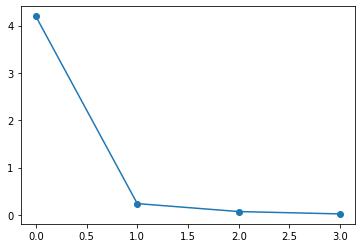

In [49]:
plt.plot(var,"o-")
plt.show()

In [51]:
X  = torch.tensor(X, dtype=torch.float)
XX = X @ torch.stack(pcs[:2]).T

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  """Entry point for launching an IPython kernel.


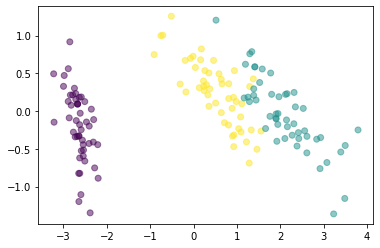

In [59]:
species = {"Iris-setosa":0, "Iris-virginica":1, "Iris-versicolor":2}
plt.scatter(XX[:,0], XX[:,1], c = [species[d] for d in data_y], alpha = 0.5)
plt.show()